# Análise de fraudes de transações de cartão de crédito

Entendimento do negócio:

Trata-se da análise de dados de uma base com amostras de transações realizadas em cartões de créditos ocorridas num intervalo de 2 dias.
A fonte de dados foi obtida através do site kaggle.com e possui as seguintes features:
Características V1, V2, … V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Time' e 'Amount'. O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Valor' é o valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. A característica 'Classe' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

In [18]:
#importação e obtenção de dados

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


tabela = pd.read_csv("creditcard.csv")
tabela.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
#Ajuste de dados => listando tipos de dados

tabela.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
#Ajustes de dados => validando dados numéricos

tabela.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0    284315
1       492
Name: Class, dtype: int64


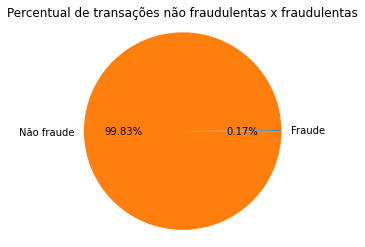

In [25]:
#Análise exploratóra => Total e percenual de transações fraudulentas e não fraudulentas

print(tabela["Class"].value_counts())

labels = ['Fraude', 'Não fraude']

num_fraude = round(tabela['Class'].value_counts()[1]/len(tabela) * 100, 2)
num_nao_fraude = round(tabela['Class'].value_counts()[0]/len(tabela) * 100, 2)

sizes = [num_fraude, num_nao_fraude]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0)
ax.axis('equal')
ax.set_title('Percentual de transações não fraudulentas x fraudulentas')

plt.show()


Text(0.5, 1.0, 'Matriz de correlação de transações de cartão de crédito')

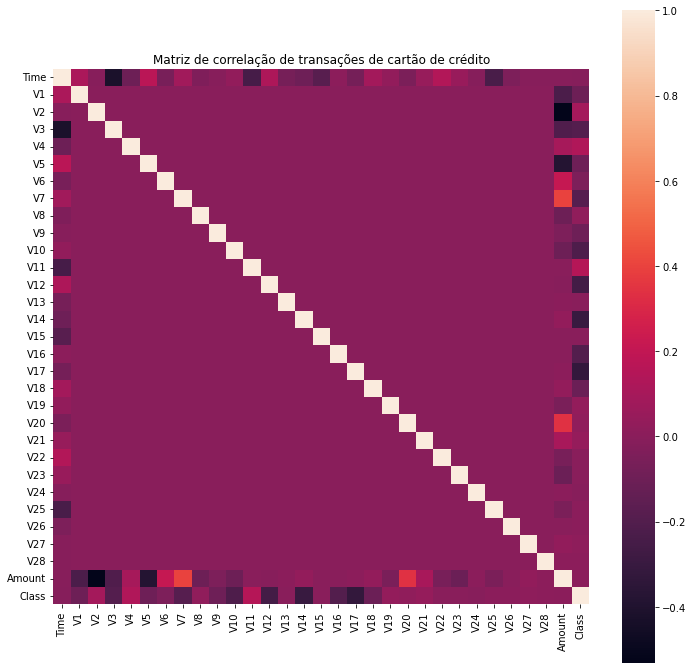

In [23]:
#Análise de dados => correlação entre as features
matrizcorrelacao = tabela.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    matrizcorrelacao,
    square=True,
    
);

ax.set_title('Matriz de correlação de transações de cartão de crédito')

Notamos rapidamente várias correlações fortes:

Quantidade e: V20, V7

e correlações negativas entre:

Quantidade e: V5, V2

Tempo e: V3, V11, V25

e nenhuma correlação real entre V1 até V28.